In [1]:
from budgetkeras import *

import pandas as pd
import seaborn as sns

titanic_X = pd.read_csv('titanic_X.csv', index_col='PassengerId')
titanic_Y = pd.read_csv('titanic_Y.csv', index_col='PassengerId')

titanic_train_Y = titanic_Y.to_numpy().T
titanic_train_X = titanic_X.to_numpy() 

X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
Y = np.array([[0,1,1,0]])

In [77]:
add, compile_model, summary = sequential()
add(dense(2, input_shape=(2,), activation=relu, initializer=kaiming))
# add(dense(2, activation=relu, initializer=kaiming))
add(dense(1, activation=sigmoid, initializer=xavier))

fit = compile_model(gradient_descent_with_momentum(learning_rate=0.1), binary_crossentropy) 

history, predict = fit(X, Y, epochs=500)

In [78]:
summary()

+--------------------+------------------------------+
|    Hidden Units    |     Activation Function      |
+--------------------+------------------------------+
|         2          |         relu_forward         |
|         1          |       sigmoid_forward        |
+--------------------+------------------------------+


<AxesSubplot:xlabel='epochs', ylabel='loss'>

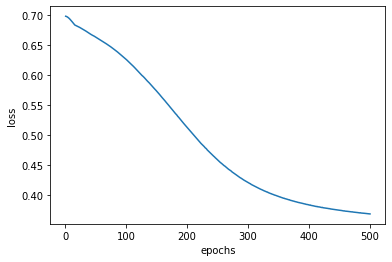

In [79]:
history_data = pd.DataFrame({'loss': history, 'epochs' :list(range(1, len(history)+1))})

sns.lineplot(data=history_data, x='epochs', y='loss')

In [80]:
np.around(predict(X), 3)

array([[0.494, 0.494, 0.961, 0.049]])

In [13]:
add, compile_model, summary = sequential()
add(dense(128, input_shape=(16,), activation=tanh, initializer=xavier))
add(dense(128, activation=tanh, initializer=xavier))
add(dense(1, activation=sigmoid, initializer=xavier))

fit = compile_model(RMSprop(learning_rate=0.01), binary_crossentropy) 

history, predict = fit(titanic_train_X, titanic_train_Y, epochs=1000)

<AxesSubplot:xlabel='epochs', ylabel='loss'>

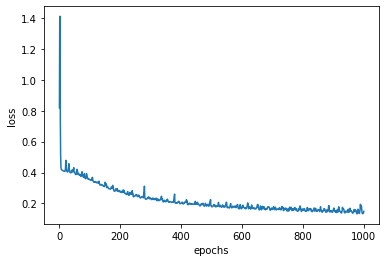

In [14]:
history_data = pd.DataFrame({'loss': history, 'epochs' :list(range(1, len(history)+1))})

sns.lineplot(data=history_data, x='epochs', y='loss')

In [12]:
summary()

+--------------------+------------------------------+
|    Hidden Units    |     Activation Function      |
+--------------------+------------------------------+
|        128         |         tanh_forward         |
|        128         |         tanh_forward         |
|         1          |       sigmoid_forward        |
+--------------------+------------------------------+


In [21]:
np.around(predict(titanic_train_X), 3)

array([[0.38 , 1.   , 0.837, 1.   , 0.009, 0.106, 0.   , 0.003, 1.   ,
        1.   , 0.998, 1.   , 0.066, 0.   , 0.074, 0.861, 0.   , 0.318,
        0.218, 1.   , 0.001, 0.289, 1.   , 0.969, 0.   , 0.703, 0.11 ,
        0.001, 0.845, 0.085, 0.013, 1.   , 0.843, 0.202, 0.056, 0.502,
        0.11 , 0.051, 0.   , 0.898, 0.002, 0.021, 0.114, 1.   , 0.645,
        0.085, 0.   , 0.843, 0.003, 0.007, 0.   , 0.052, 1.   , 1.   ,
        0.   , 0.702, 0.994, 0.357, 1.   , 0.   , 0.685, 1.   , 0.018,
        0.   , 0.284, 1.   , 0.998, 0.116, 0.995, 0.001, 0.207, 0.   ,
        0.   , 0.005, 0.969, 0.047, 0.085, 0.085, 1.   , 0.983, 0.026,
        0.093, 0.843, 0.006, 0.999, 0.999, 0.001, 0.085, 1.   , 0.076,
        0.096, 0.065, 0.021, 0.   , 0.   , 0.085, 0.001, 1.   , 1.   ,
        0.046, 0.449, 0.085, 0.006, 0.156, 0.   , 0.293, 0.31 , 0.085,
        0.021, 0.999, 0.   , 0.03 , 0.039, 0.077, 0.005, 0.051, 0.   ,
        0.018, 0.   , 0.06 , 0.   , 0.085, 0.   , 0.995, 0.   , 1.   ,
      